# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 7 Dimensional Reduction

Thursday Lab: 10/08/2020 3:15 pm - 4:30 pm

Friday Lab: 10/09/2020 9:25 am - 10:40 am

### Outline

1) Introduction to data pre processing 

2) Revisit Linear Regression and building definitions 

3) Principal Component Analysis 

4) Using TSNE 


## Warmup and Syntax (15 minutes)

Download miles_per_gallon data from canvas. Load it into your environment using code from previous labs or any other reasonable method. This data is not a well formatted file so we need some extra processing to load it properly. This step is commonly referred to as preprocessing data. 

```python
import numpy as np 
import matplotlib.pyplot as plt 
d = []; 
# read data from file, one line at a time 
line_number = 0; 
with open( "auto-mpg.data", "r" ) as source:
    for line in source:
        line = line.replace( "      ", '\t' ); # replace 6 spaces with tab
        line = line.replace( "   ", '\t' );    # replace 3 spaces with tab
        line = line.replace( "  ", '\t' );     # replace 2 spaces with tab
        line = line.replace( '\n' , '' );      # remove newline characters
        fields = line.split( '\t' );           # split based on tab characters
        # add to data if there are no ? fields 
        if( line.find( '?' ) < 0.0 ):
            d.append(fields);
        else:
            print( "Removing instance " + str(line_number) + " due to ? data" ); 
        line_number += 1; 

```

Print this data. It is still in string format, target values are first column, and last column is not useful for regression. So we need more cleaning before using it in an experiment.

```python
# size of d (no legend in first row this time)
N = len( d );
# number of things in each instance
n = len( d[0] );
data = np.zeros( (N,n-1) ) 
for k in range(N):
    for i in range(n-1):
        data[k,i] = float( d[k][i] );
```

Removing instance 32 due to ? data
Removing instance 126 due to ? data
Removing instance 330 due to ? data
Removing instance 336 due to ? data
Removing instance 354 due to ? data
Removing instance 374 due to ? data


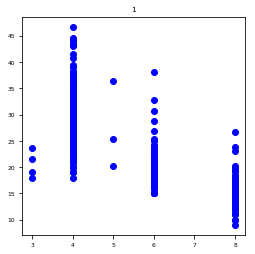

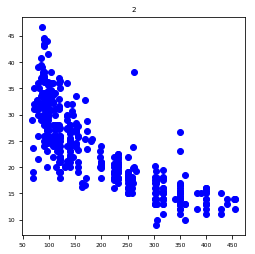

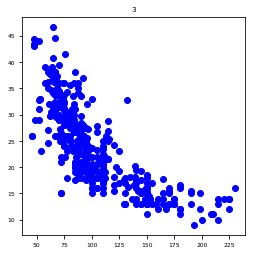

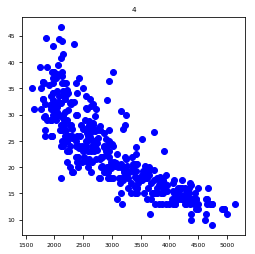

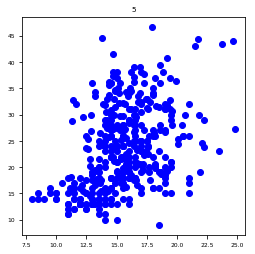

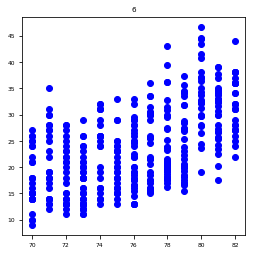

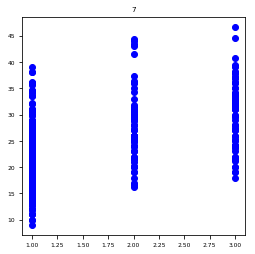

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np
import os

filename = "/auto-mpg.data"
user_path = os.getcwd()
path = user_path + filename
d = []; 
# read data from file, one line at a time 
line_number = 0; 
with open( path, "r" ) as source:
    for line in source:
        line = line.replace( "      ", '\t' ); # replace 6 spaces with tab
        line = line.replace( "   ", '\t' );    # replace 3 spaces with tab
        line = line.replace( "  ", '\t' );     # replace 2 spaces with tab
        line = line.replace( '\n' , '' );      # remove newline characters
        fields = line.split( '\t' );           # split based on tab characters
        # add to data if there are no ? fields 
        if( line.find( '?' ) < 0.0 ):
            d.append(fields);
        else:
            print( "Removing instance " + str(line_number) + " due to ? data" ); 
        line_number += 1; 
        
        
# 

# size of d (no legend in first row this time)
N = len( d ); 
# number of things in each instance 
n = len( d[0] ); 

# set up features and labels 
# mpg is the label, in column zero
# car name is in last column -- don't care about that 

data = np.zeros( (N,n-1) )
for k in range(N):
    for i in range(n-1):
        data[k,i] = float( d[k][i] ); 

# we'll put the features in soon enough 

plt.rcParams['figure.figsize'] = (4,4) # Pick something here, bigger than (6.0,4.0)
plt.rcParams['font.size'] = 6 # pick something bigger than 10 

# quickly plot the data
for k in range(1,8):
    plt.plot( data[:,k], data[:,0] , 'bo' ); plt.title( str(k) ); 
    plt.savefig( "feature" + str(k) + ".png" , dpi=300 ); 
    plt.show()


In [35]:
# create Labels and Features structures 
Labels = np.zeros(N)
Features = np.zeros((N,n-2))
for k in range(N):
    Labels[k] = data[k,0]; 
    # take first feature as-is 
    for l in range(n-2):
        Features[k,l] = data[k,l+1];  
print (len(Features[0]))
#reg_process(Features,Labels)

7


## Task 1: Perform Regression and plot predictions vs test (15 minutes) 

* Divide data in testing and training sets (make sure to use first column as y). 

* Train a regression model on training data. 

* Make predictions using test data. 

* Plot predictions vs y-test and see how good or bad it performs. 

* Print MSE(mean squared error) for this model.

**Be prepared to discuss your results with the class.**

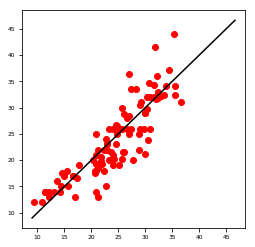

12.991180462137626
<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Xtrain, Xtest, ytrain, ytest = train_test_split(Features, Labels)
regr = LinearRegression();
regr.fit( Xtrain , ytrain);
predictions = regr.predict( Xtest);
m1 = min( Labels );
m2 = max( Labels ); 
plt.plot( predictions,ytest,'ro' ); 
plt.plot( [m1,m2], [m1,m2], 'k-' );
plt.show()
print (mean_squared_error(predictions,ytest))
print(regr.score)

## Task 2: Bundle code from **Task 1** into a function (10 minutes) 

Create a function named reg_process that takes features and labels as input and performs all steps of task 1. Determine as a group what you should be returning. 

**Be prepared to discuss your definition with the class.**

In [10]:
def reg_process(features, target_values):
    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    Xtrain, Xtest, ytrain, ytest = train_test_split(features, target_values)
    regr = LinearRegression();
    regr.fit( Xtrain , ytrain);
    predictions = regr.predict( Xtest);
    m1 = min( Labels ); m2 = max( Labels ); 
    plt.plot( predictions,ytest,'ro' ); 
    plt.plot( [m1,m2], [m1 ,m2], 'k-' );
    plt.show()
    print (mean_squared_error(predictions,ytest))

## Task 3: Reduce the number of features using PCA (15 minutes) 

Import PCA from sklearn and use it to fit your data. Take some time to look at the documentation [scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

```python
from sklearn.decomposition import PCA
pca = PCA(n_components=4, whiten = False, random_state = 2019) 
pca.fit( Features_from_your_data)
```

Print variance ratio and discuss what this represents.

```python
print (pca.explained_variance_ratio_)
```

Transform your data to lower dimensions and explore the transformed data.

```python
X_pca=pca.transform(Features_from_your_data)
```
Send this data to your function reg_process created in **Task 2**.

Identify and discuss the differences from the original data. Try other values for n_components and repeat.

**Be prepared to discuss your results with the class.**

[9.97561506e-01 2.06279691e-03 3.55947852e-04 1.49502847e-05
 3.92231415e-06 5.16380051e-07 3.59910740e-07]


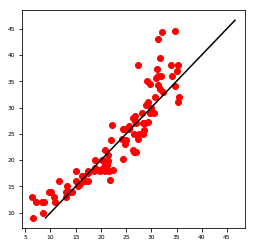

12.75531286177386


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7, whiten = False, random_state = 2019)
pca.fit( Features)
print (pca.explained_variance_ratio_)
X_pca=pca.transform(Features)
#X_pca_reconst = pca.inverse_transform(X_pca)

reg_process(X_pca,Labels)

[0.99756151]


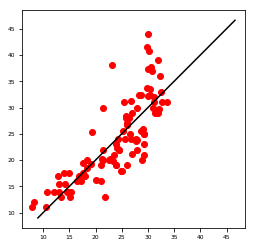

20.369360754088188


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, whiten = False, random_state = 2019)
pca.fit( Features)
print (pca.explained_variance_ratio_)

X_pca=pca.transform(Features)
#X_pca_reconst = pca.inverse_transform(X_pca)
reg_process(X_pca,Labels)

## Task 4: Reduce number of features using t-SNE (20 minutes) 

First lets read about t-SNE and read this article and discuss this in your breakout room [t-SNE](https://medium.com/@layog/i-dont-understand-t-sne-part-1-50f507acd4f9)

Import TSNE from sklearn and use it to fit your data. Explore the documentation here [scikit-learn TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

```python
from sklearn.manifold import TSNE
```

Print kl_divergence and discuss what it represents.

```python
print (tsne.kl_divergence_ )
```

Transform your data to lower dimensions and print the new data.

```python
X_tsne =tsne.transform(Features_from_your_data)

```

Identify and discuss the differences from the original data. Try other values for n_components and repeat.

**Be prepared to discuss your results with the class.**

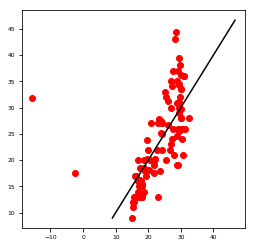

51.96683701513982


In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=4,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2019)
X_tsne = tsne.fit_transform(Features)
reg_process(X_tsne,Labels)